# Using ryd-numerov from julia

To be able to call ryd-numerov from julia we use the [PyCall.jl](https://github.com/JuliaPy/PyCall.jl) package.
With that, we can "import" `ryd_numerov` simply as follows:

In [1]:
using PyCall

ryd_numerov = pyimport("ryd_numerov");

Now we should be able to use the `ryd_numerov` package from julia.
We can test this by creating an example state and integrating the radial wavefunction via the numerov method.

In [2]:
state = ryd_numerov.RydbergState("Rb", n = 50, l = 0, j = 0.5)
println(state)

state.create_wavefunction()
println(state.wavefunction.w_list[1:10])
println(state.wavefunction.grid.z_list[1:10])

PyObject RydbergState(Rb, n=50, l=0, j=0.5, m=None)
[3.558271500715413e-5, 0.00010374225386434998, 0.00018853776965527656, 0.0002835668865510282, 0.00038358164095462724, 0.0004838753754278541, 0.0005801290830879123, 0.0006684034651001174, 0.0007451830901202029, 0.0008074367139022469]
[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]


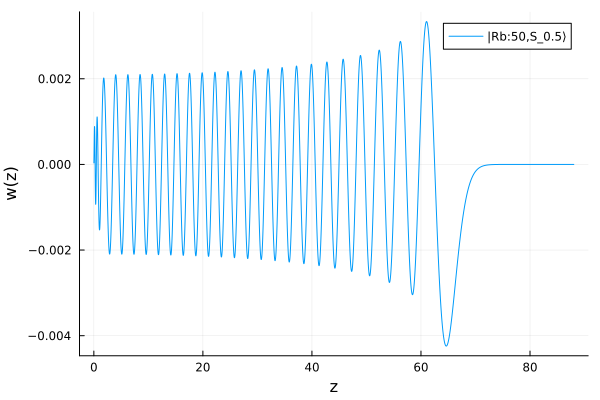

In [3]:
using Plots

p = plot(
	state.wavefunction.grid.z_list,
	state.wavefunction.w_list,
	xlabel = "z",
	ylabel = "w(z)",
	label = state.get_label("ket"),
)

display(p)